In [124]:
"""
-----------------------------------------------------------------------------
MNIST digit data reading helper
-----------------------------------------------------------------------------
AUTHOR: Soumitra Samanta (soumitra.samanta@gm.rkmvu.ac.in)
-----------------------------------------------------------------------------
"""

import gzip
import numpy as np
import matplotlib.pyplot as plt
import time

# Read MNIST data:
There are many [ways](https://stackoverflow.com/questions/40427435/extract-images-from-idx3-ubyte-file-or-gzip-via-python) you can read the MNIST data. Here is a [way](https://stackoverflow.com/a/62781370) to read all the information.

Train data (X) size: (60000, 28, 28), and labels (Y) size: (60000,)
Test data (X) size: (10000, 28, 28), and labels (Y) size: (10000,)


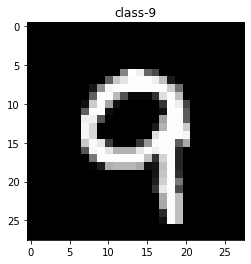

Train image 48484-th sample 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 132 255 240 101  73   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  96 200 228 253 253 253 239 191
   26   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  

In [3]:
def read_images(filename):
    """Read MNIST images"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8).reshape((image_count, row_count, column_count))
        
    return images

def read_labels(filename):
    """Read MNIST labels"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        
    return labels


dataset_path = '/home/sysadm/Documents/sem_2_Biswajit_rana/RKMVERI_2ND/class/ML/SS_assignments_1/'# Change your data path

train_image_filename = ''.join([dataset_path, 'train-images-idx3-ubyte.gz'])
train_label_filename = ''.join([dataset_path, 'train-labels-idx1-ubyte.gz'])

test_image_filename = ''.join([dataset_path, 't10k-images-idx3-ubyte.gz'])
test_label_filename = ''.join([dataset_path, 't10k-labels-idx1-ubyte.gz'])

train_images = read_images(train_image_filename)
train_labels = read_labels(train_label_filename)
print('Train data (X) size: {}, and labels (Y) size: {}' .format(train_images.shape, train_labels.shape))

test_images = read_images(test_image_filename)
test_labels = read_labels(test_label_filename)
print('Test data (X) size: {}, and labels (Y) size: {}' .format(test_images.shape, test_labels.shape))

rand_ids = np.random.choice(train_images.shape[0])
plt.imshow(train_images[rand_ids, :, :], cmap='gray')
plt.title('class-'+str(train_labels[rand_ids]))
plt.show()

print('Train image {}-th sample ' .format(rand_ids))
print(train_images[rand_ids, :, :])



# Extract 20% data from thhe training data as a validation set. <font color='red'>Please do not use some standard function from scikit-learn or others!</font>

In [ ]:
# Your validation set extraction script/code 

In [4]:
def simple_split(X, y, test_size):
  num_samples = len(X)
  val_size = int(test_size * num_samples)
  indices = np.random.permutation(num_samples)
  indices_val = indices[:val_size]
  indices_train = indices[val_size:]
  X_train = X[indices_train]
  X_val = X[indices_val]
  y_train = y[indices_train]
  y_val = y[indices_val]
  return X_train, X_val, y_train, y_val

# Usage:
X_train, X_val, y_train, y_val = simple_split(train_images, train_labels, 0.2)

In [5]:
print(X_train.shape)#img
print(y_train.shape)#lab
print(X_val.shape)#img
print(y_val.shape)#lab

(48000, 28, 28)
(48000,)
(12000, 28, 28)
(12000,)


In [6]:
X_train=X_train.reshape(X_train.shape[0],-1)
X_val=X_val.reshape(X_val.shape[0],-1)
test_images=test_images.reshape(test_images.shape[0],-1)
print(X_train.shape)
print(X_val.shape)
print(test_images.shape)

(48000, 784)
(12000, 784)
(10000, 784)


44487
8


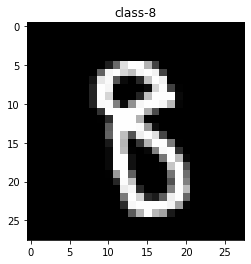

7300
0


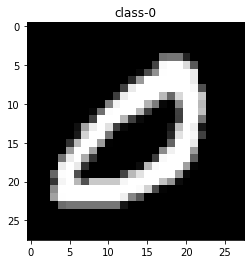

In [86]:
#peek

rand_ids = np.random.choice(X_train.shape[0])
print(rand_ids)
print(y_train[rand_ids])
plt.imshow(X_train[rand_ids, :].reshape(28,28), cmap='gray')
plt.title('class-'+str(y_train[rand_ids]))
plt.show()

# rand_ids = np.random.choice(X_val.shape[0])
rand_ids=7300
print(rand_ids)
print(y_val[rand_ids])
plt.imshow(X_val[rand_ids, :].reshape(28,28), cmap='gray')
plt.title('class-'+str(y_val[rand_ids]))
plt.show()

In [128]:
y_val[700:800]

array([3, 2, 4, 4, 8, 1, 1, 4, 4, 7, 8, 7, 0, 1, 4, 6, 9, 8, 0, 5, 7, 5,
       0, 9, 3, 8, 0, 0, 5, 3, 5, 9, 4, 8, 6, 7, 6, 2, 3, 9, 7, 1, 3, 0,
       8, 5, 2, 1, 4, 5, 0, 3, 4, 8, 7, 9, 7, 1, 5, 6, 4, 0, 3, 0, 9, 1,
       7, 9, 3, 9, 5, 4, 7, 2, 7, 5, 7, 4, 9, 0, 1, 9, 5, 6, 3, 6, 7, 3,
       2, 8, 3, 7, 3, 4, 4, 0, 0, 3, 1, 2], dtype=uint8)

# Implement k-NN classification rule/algorithm, we have discussed in our class. <font color='red'>Please do not use some standard function from scikit-learn or others!</font>

In [ ]:
# Your k-NN algorithm script/code 

In [67]:
def L1(x1,x2):
    return np.sum(np.abs(x1 - x2))
def L2(x1,x2):
    return np.sqrt(np.sum((x1 - x2)**2))
def Linf(x1,x2):
    return np.max(np.abs(x1 - x2))


In [122]:

def predict(x_train, y_train, x_test, k, distance_metric):
    predictions = []

    for test_point in x_test:
        distances = np.array([distance_metric(test_point, train_point) for train_point in x_train])
        nearest_indices = np.argsort(distances)[:k]

        neighbor_labels = y_train[nearest_indices]
        prediction = np.argmax(np.bincount(neighbor_labels))
        predictions.append(prediction)

    # return distances,nearest_indices,neighbor_labels,predictions
    return predictions

def acc(y_true, y_pred):
    return np.sum(np.array(y_true) == np.array(y_pred)) / len(y_true)

In [132]:
p=[L1,L2,Linf]
k= list(range(1,27,2))
# accuracy=np.zeros((3,13))
accuracy=[]
for index1,i in enumerate(p):
    for index2,j in enumerate(k):
        start=time.time()
        print(i,j)
        pred=predict(X_train, y_train, X_val, j, i)
        accuracy.append(acc(pred,y_val)*100)
        end=time.time()
        print(f"Taken time: {end-start} sec.")
        print(accuracy)
        print(pred)

# pred=predict(X_train, y_train, X_val[7300:7301,:], 3, L1)
# pred
    

<function L1 at 0x7fcf645dc820> 1


Taken time: 5360.007029056549 sec.
[77.06666666666668]
[4, 8, 3, 8, 0, 6, 7, 7, 1, 2, 1, 7, 1, 7, 1, 1, 8, 0, 7, 6, 4, 1, 4, 4, 6, 7, 1, 4, 4, 7, 1, 6, 3, 4, 1, 5, 1, 7, 3, 7, 8, 2, 9, 4, 1, 9, 4, 2, 9, 8, 6, 0, 2, 0, 8, 1, 2, 5, 0, 1, 5, 4, 9, 1, 8, 5, 1, 7, 6, 3, 7, 0, 3, 2, 4, 2, 2, 9, 0, 6, 5, 1, 6, 7, 1, 2, 0, 8, 9, 1, 1, 0, 4, 2, 1, 0, 0, 1, 1, 2, 2, 8, 2, 6, 8, 6, 6, 0, 5, 0, 5, 5, 6, 1, 0, 8, 1, 7, 1, 0, 1, 6, 6, 1, 0, 9, 4, 8, 8, 6, 3, 6, 1, 0, 0, 0, 9, 1, 0, 0, 2, 7, 7, 1, 5, 7, 3, 0, 6, 7, 3, 9, 6, 2, 2, 0, 2, 8, 1, 7, 3, 9, 7, 5, 6, 7, 4, 1, 1, 0, 7, 2, 7, 3, 3, 4, 3, 1, 5, 1, 9, 1, 7, 2, 8, 6, 1, 7, 9, 2, 4, 1, 6, 0, 0, 6, 0, 1, 0, 7, 9, 1, 6, 2, 1, 1, 1, 8, 1, 7, 2, 2, 9, 6, 5, 6, 5, 1, 8, 9, 7, 5, 9, 1, 6, 0, 4, 1, 1, 8, 9, 0, 8, 9, 9, 1, 2, 2, 0, 3, 1, 8, 3, 1, 1, 5, 6, 1, 7, 6, 6, 5, 5, 3, 1, 8, 7, 3, 5, 1, 1, 8, 4, 2, 1, 5, 9, 2, 8, 0, 6, 1, 5, 1, 1, 1, 4, 8, 6, 4, 9, 1, 8, 9, 3, 7, 1, 1, 8, 2, 8, 0, 7, 1, 0, 0, 8, 2, 9, 3, 7, 1, 6, 4, 4, 4, 5, 6, 3, 6, 7, 8, 9, 0, 4,

KeyboardInterrupt: 

In [ ]:
np.array(accuracy).reshape(3,13)


In [131]:
x=[3, 2, 4, 4, 8, 1, 1, 7, 4, 7, 8, 7, 0, 1, 4, 6, 9, 9, 0, 5, 7, 5, 0, 9, 3, 7, 0, 0, 5, 8, 5, 7, 0, 8, 6, 1, 6, 2, 3, 1, 7, 1, 3, 0, 8, 3, 2, 6, 1, 5, 0, 3, 4, 8, 7, 9, 7, 1, 5, 0, 0, 0, 3, 0, 9, 1, 7, 9, 1, 9, 5, 4, 9, 2, 7, 5, 7, 0, 9, 0, 1, 9, 0, 6, 3, 6, 7, 1, 2, 8, 3, 7, 1, 9, 4, 0, 0, 3, 1, 2]

y=[3, 2, 4, 4, 8, 1, 1, 4, 4, 7, 8, 7, 0, 1, 4, 6, 9, 8, 0, 5, 7, 5,
       0, 9, 3, 8, 0, 0, 5, 3, 5, 9, 4, 8, 6, 7, 6, 2, 3, 9, 7, 1, 3, 0,
       8, 5, 2, 1, 4, 5, 0, 3, 4, 8, 7, 9, 7, 1, 5, 6, 4, 0, 3, 0, 9, 1,
       7, 9, 3, 9, 5, 4, 7, 2, 7, 5, 7, 4, 9, 0, 1, 9, 5, 6, 3, 6, 7, 3,
       2, 8, 3, 7, 3, 4, 4, 0, 0, 3, 1, 2]
print(np.array(x)==np.array(y))
np.sum(np.array(x)==np.array(y))
# acc([3, 2, 4, 4, 8],[3, 2, 4, 4, 8])

[ True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True False  True  True  True False  True False False  True  True False
  True  True  True False  True  True  True  True  True False  True False
 False  True  True  True  True  True  True False  True  True  True False
 False  True  True  True  True  True  True  True False  True  True  True
 False  True  True  True  True False  True  True  True  True False  True
  True  True  True False  True  True  True  True False False  True  True
  True  True  True  True]


79

In [116]:
np.array(accuracy).reshape(3,13)

array([[0.09725   , 0.09725   , 0.09725   , 0.09725   , 0.11633333,
        0.09725   , 0.09725   , 0.09725   , 0.11633333, 0.11633333,
        0.11633333, 0.11633333, 0.11633333],
       [0.09975   , 0.09975   , 0.09975   , 0.09975   , 0.09975   ,
        0.09975   , 0.10933333, 0.10933333, 0.10933333, 0.11633333,
        0.11633333, 0.11633333, 0.11633333],
       [0.09725   , 0.09725   , 0.09725   , 0.09725   , 0.09725   ,
        0.0955    , 0.0955    , 0.0955    , 0.0955    , 0.0955    ,
        0.0955    , 0.0955    , 0.0955    ]])

In [91]:
for index,i in enumerate(p):
    print(index,i)
for index2,j in enumerate(k):
    print(index2,j)
accuracy=np.zeros((3,13))
print(accuracy)

0 <function L1 at 0x7fcf645dc820>
1 <function L2 at 0x7fcf645dc9d0>
2 <function Linf at 0x7fcf64330700>
0 1
1 3
2 5
3 7
4 9
5 11
6 13
7 15
8 17
9 19
10 21
11 23
12 25
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
